**BUSINESS UNDERSTANDING**
To get deep insights from the 2020 Stack Overflow Survey. 
To answer business questions using data visualization, machine learning methods. 

**DATA UNDERSTANDING**
1. Import data frame;
2. Obtain number of rows and columns;
3. Investigate the number of columns with missing values;

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import UdacityProjectOne as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public_2020.csv')
#schema = pd.read_csv('./survey_results_public_schema_2020.csv') #question for each column
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
#provide the number of rows and columns in the dataset
num_rows = df.shape[0] 
num_cols = df.shape[1]
num_rows
num_cols

61

In [3]:
#provide a set of columns with 0 missing values
no_nulls =set(df.columns[df.isnull().mean()==0])
no_nulls

{'Respondent'}

In [4]:
#provide a set of columns with more than 25% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean()>0.25])
most_missing_cols

{'Age',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'Ethnicity',
 'JobSat',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWOnboardGood',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'OrgSize',
 'PurchaseWhat',
 'SOPartFreq',
 'Sexuality',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WorkWeekHrs',
 'YearsCodePro'}

**DATA PREPARATION**
1. Make bar plots for "MainBranch": developer professions, and "EdLevel": educational level;
2. Make histograph plot of columns "Age", "CompTotal", "CovertedComp","WorkweekHrs";
3. Make heatmap plot of columns  "Age", "CompTotal", "CovertedComp","WorkweekHrs".

In [5]:
def barplot(column_name):
    '''
    This function provide the counts for the each series in a column and plot it in bar plot
    
    Input:
    column_name
    
    Output: 
    plt bar plot of value counts
    
    '''
    vals = df[column_name].value_counts()
    (vals/df.shape[0]).plot(kind="bar")
    plt.title(column_name)
  

In [6]:
vals = df['MainBranch'].value_counts()
vals

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

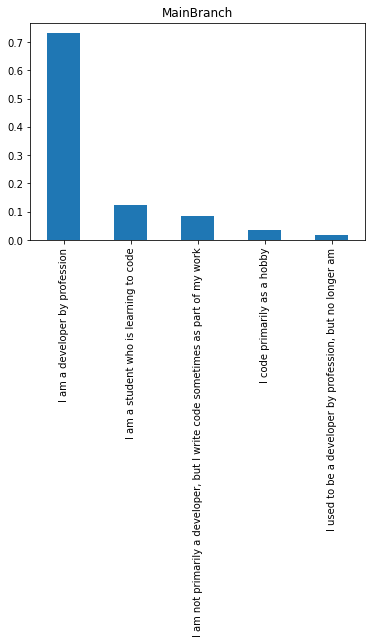

In [7]:
barplot('MainBranch')

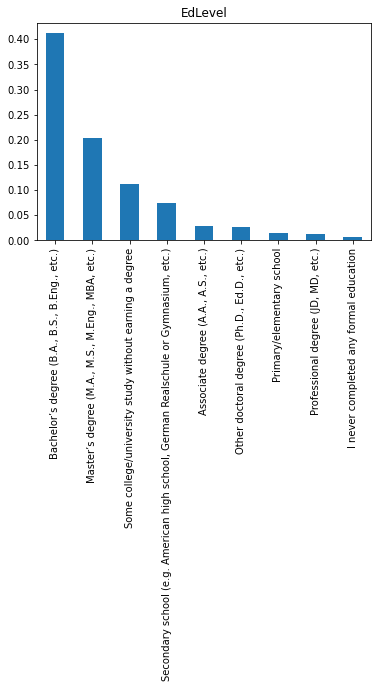

In [8]:
barplot('EdLevel')

In [9]:
df.describe() #all the numeric columns and their statistics summary

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFDFCCC0A0>,
      dtype=object)

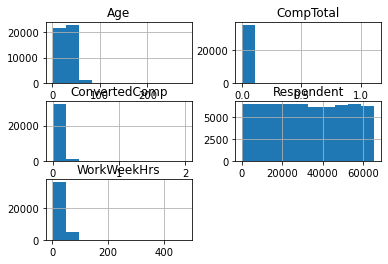

In [10]:
df.hist() #hist plot

In [11]:
df.shape#total number of rows and clomuns

(64461, 61)

**Question One: What are the current top 5 popular programming languages? And What are the top 5 programming languages in the future?**

In [12]:
#List the top 5 programming languages for developers worked with last year
language1 = df['LanguageWorkedWith'].value_counts() 
language1.head()

HTML/CSS;JavaScript;PHP;SQL              1073
HTML/CSS;JavaScript                       900
C#;HTML/CSS;JavaScript;SQL                856
C#;HTML/CSS;JavaScript;SQL;TypeScript     754
HTML/CSS;JavaScript;TypeScript            697
Name: LanguageWorkedWith, dtype: int64

In [13]:
#Count the number of each specific programming languages
possible_vals = ["HTML/CSS", "JavaScript", 
                 "C#", "SQL", "PHP",
                 "TypeScript",]

temp_dic = dict()

for element in possible_vals:
    count = 0
    count = (df['LanguageWorkedWith'].astype(str)).apply(lambda x: 1 if element in x else 0).sum()
    temp_dic[element] = count

temp_dic
#temp_dic_sum(temp_dic(values))

{'HTML/CSS': 36181,
 'JavaScript': 38822,
 'C#': 18041,
 'SQL': 31413,
 'PHP': 15007,
 'TypeScript': 14578}

Text(0.5, 1.0, 'Current Popular Languages')

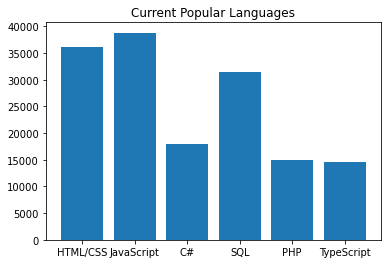

In [15]:
plt.bar(range(len(temp_dic)), list(temp_dic.values()), align='center')
plt.xticks(range(len(temp_dic)), list(temp_dic.keys()))
plt.title('Current Popular Languages')

In [18]:
#Count the number of programming languages for next year.
possible_vals = ["Python", "Rust", "HTML/CSS", "JavaScript",
                 "C#", "SQL", "PHP",
                 "TypeScript",]

temp_dic1 = dict()

for element in possible_vals:
    count = 0
    count = (df['LanguageDesireNextYear'].astype(str)).apply(lambda x: 1 if element in x else 0).sum()
    temp_dic1[element] = count

temp_dic1

{'Python': 26682,
 'Rust': 10563,
 'HTML/CSS': 20771,
 'JavaScript': 26188,
 'C#': 13674,
 'SQL': 19970,
 'PHP': 7106,
 'TypeScript': 17150}

Text(0.5, 1.0, 'Languages Desire Next Year')

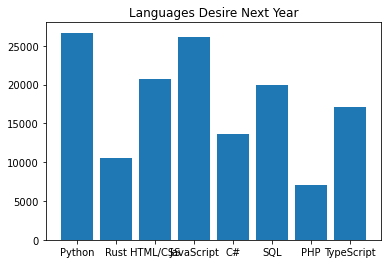

In [20]:
#plot the programming languages desire for next year
plt.bar(range(len(temp_dic1)), list(temp_dic1.values()), align='center')
plt.xticks(range(len(temp_dic1)), list(temp_dic1.keys()))
plt.title('Languages Desire Next Year')

In [21]:
#List new learn languages (not in use for this post)
language3 = df['NEWLearn'].value_counts()
language3.head()

Every few months        20938
Once a year             20693
Once every few years    13284
Once a decade            1241
Name: NEWLearn, dtype: int64

**Question Two: is there any relation between age and salary, weekly working hours and salary?**

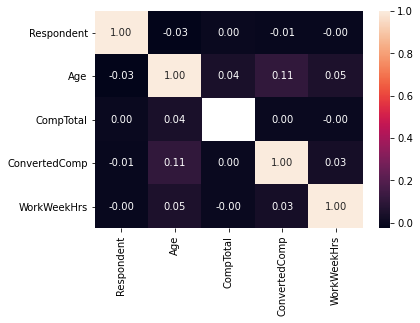

In [22]:
#heatmap plot between columns "Respondent", "Age", "CompTotal", "ConvertedComp","WorkWeekHrs"
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Qustion Three: Can we build a linear regression model to predict the salary?**

In [23]:
#drop the NaN values 
#drop the NaN values is a quick way to get the data ready for machine learning modeling
#(the sklearn will result in errors so model will not be constructed)
num_vars = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]
df_dropna = num_vars.dropna(axis=0)

In [24]:
#split the data into explanatory and response variables
X = df_dropna[['Age','ConvertedComp','WorkWeekHrs']]
y = df_dropna['CompTotal']

In [25]:
#drop the NaN values (the sklearn will result in errors so model will not be constructed)
num_vars = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]
df_dropna = num_vars.dropna(axis=0)

X = df_dropna[['Age','ConvertedComp','WorkWeekHrs']]
y = df_dropna['CompTotal']

#build the linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

#Model validation: 
y_test_preds = lm_model.predict(X_test)

print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

-2.0844157589456897e+76
1.784543165147552e+91


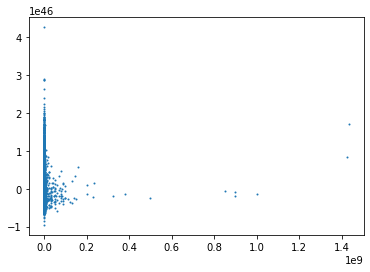

In [40]:
plt.scatter(y_test, y_test_preds, 1)